## Import Necessary Packeges

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DATA GATHERING

In [2]:
#Load Csv
df = pd.read_csv('Sales Data.csv')

In [4]:
#Checking that File is Properly Load 
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
#Remove Unnecessary Column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [8]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [20]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Sales']=pd.to_numeric(df['Sales'], errors='coerce').astype(float)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,earning,Earning
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95,11.95


## DATA WRANGLING

In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [11]:
df = df.drop_duplicates()

In [13]:
df['Earning'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,earning,Earning
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95,11.95


In [21]:
df.shape

(185686, 12)

<Axes: ylabel='Earning'>

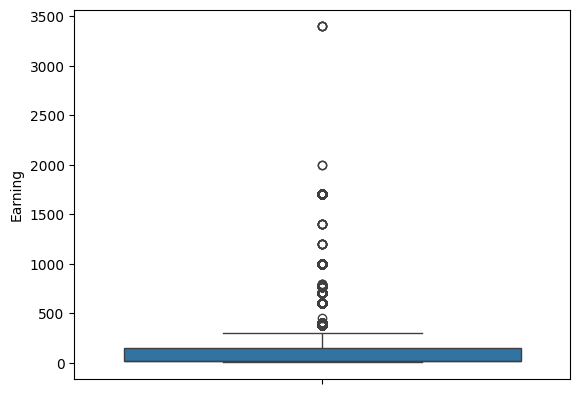

In [23]:
sns.boxplot(df['Earning'])

## Exploratory Data Analysis(EDA)

In [16]:
print('Total Earnings ',df['Earning'].sum())

Total Earnings  34465537.93999999


In [17]:
print('Average Earning per Transaction', df['Earning'].mean())

Average Earning per Transaction 185.61193595639946


In [24]:
# Earnings by products
product_earnings = df.groupby('Product')['Earning'].sum().sort_values(ascending=False)
print(product_earnings)

Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Vareebadd Phone                827200.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       346376.55
USB-C Charging Cable           285975.45
Wired Headphones               246082.76
AA Batteries (4-pack)          106041.60
AAA Batteries (4-pack)          92648.14
Name: Earning, dtype: float64


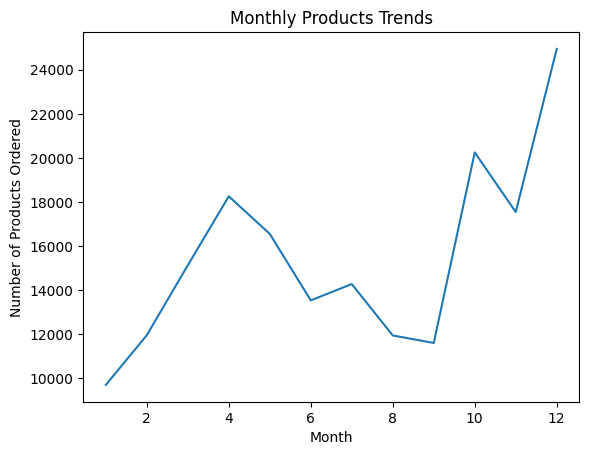

In [28]:
# Count Number of Product Ordered
df['Month'] = df['Order Date'].dt.month
monthly_trends = df.groupby('Month')['Product'].count()  # Count of products per month
plt.plot(monthly_trends.index, monthly_trends.values)
plt.title('Monthly Products Trends')
plt.xlabel('Month')
plt.ylabel('Number of Products Ordered')
plt.show()


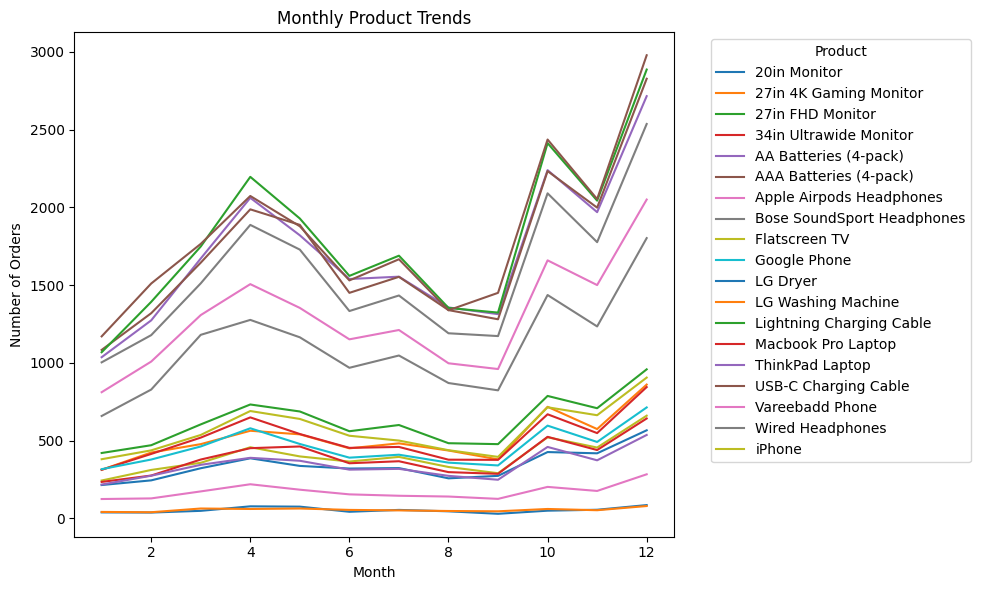

In [29]:
df['Month'] = df['Order Date'].dt.month

# Group by both 'Month' and 'Product' to get counts
monthly_trends = df.groupby(['Month', 'Product']).size().unstack(fill_value=0)

# Plotting
monthly_trends.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Product Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside
plt.tight_layout()  # To ensure that the plot is not cut off
plt.show()


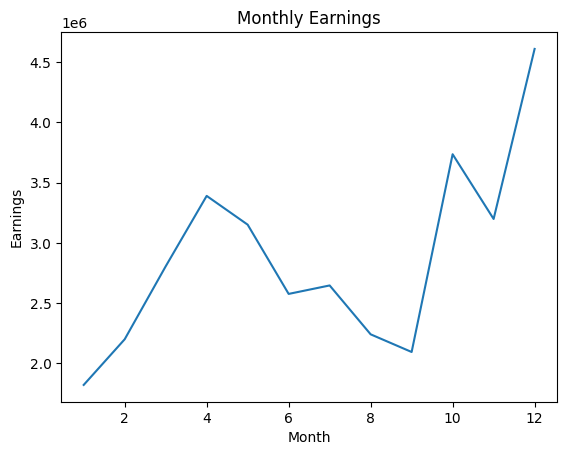

In [30]:
# Earnings Per Month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Earning'].sum()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Earnings')
plt.xlabel('Month')
plt.ylabel('Earnings')
plt.show()

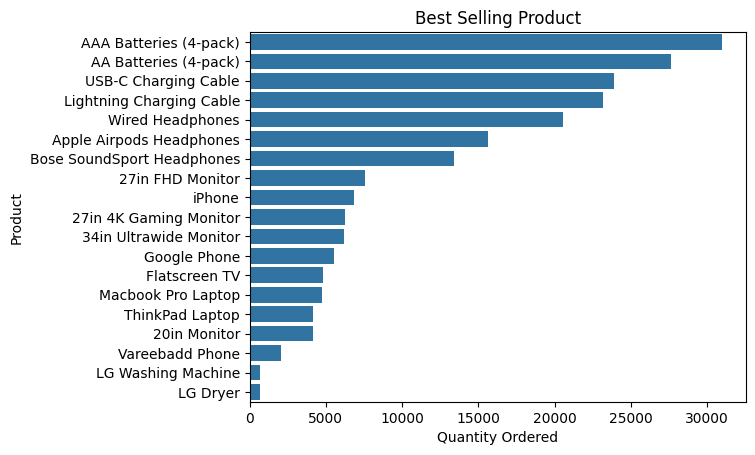

In [38]:
# Best Selling Product
best_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
sns.barplot(x=best_products.values,y=best_products.index)
plt.title('Best Selling Product')
plt.xlabel('Quantity Ordered')
plt.show()